In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


In [19]:
sampled_data = pd.read_csv("/Users/linyinghsiao/Documents/GitHub/fraud-detection-E.SUN/datasets/sample.csv")

data_info = pd.read_excel("/Users/linyinghsiao/Documents/GitHub/fraud-detection-E.SUN/datasets/31_資料欄位說明.xlsx")

cat_cols = data_info[data_info['資料格式']=='類別型']['訓練資料欄位名稱'].iloc[:-2]
columns_to_remove = ['loctm', 'stocn', 'scity', 'flg_3dsmk', 'm_loctm', 's_loctm']
cat_cols = [col for col in cat_cols if col not in columns_to_remove]
new_feat_trans2obj = ['ecfg_3dsmk','new_stocn','new_scity','weekday']
sampled_data[cat_cols] = sampled_data[cat_cols].astype('object')
sampled_data[new_feat_trans2obj] = sampled_data[new_feat_trans2obj].astype('object')

In [20]:
# Checking for missing values in the dataset
missing_values = sampled_data.isnull().sum()

# Checking the data types to identify categorical variables
data_types = sampled_data.dtypes

data_types

txkey                         object
locdt                          int64
chid                          object
cano                          object
contp                         object
etymd                         object
mchno                         object
acqic                         object
mcc                           object
conam                        float64
ecfg                          object
insfg                         object
iterm                        float64
bnsfg                         object
flam1                          int64
stscd                         object
ovrlt                         object
flbmk                         object
hcefg                         object
csmcu                         object
csmam                          int64
label                         object
diff_locdt                   float64
ecfg_3dsmk                    object
weekday                       object
h_loctm                        int64
hrs_loctm                    float64
c

In [21]:
# Columns to be dropped
columns_to_drop = ['txkey','chid', 'cano', 'mchno', 'acqic','mcc','csmcu','new_scity'] #mcc  csmcu new_scity 

# Drop the specified columns
sampled_data_dropped = sampled_data.drop(columns=columns_to_drop)

data_types = sampled_data_dropped.dtypes
data_types

locdt                          int64
contp                         object
etymd                         object
conam                        float64
ecfg                          object
insfg                         object
iterm                        float64
bnsfg                         object
flam1                          int64
stscd                         object
ovrlt                         object
flbmk                         object
hcefg                         object
csmam                          int64
label                         object
diff_locdt                   float64
ecfg_3dsmk                    object
weekday                       object
h_loctm                        int64
hrs_loctm                    float64
cano_cumcount7                 int64
chid_cumcount7                 int64
conam_log1p                  float64
flam1_log1p                  float64
csmam_log1p                  float64
flam1avg7_cano_log1p         float64
flam1avg7_log1p_cano         float64
f

In [24]:
data_types.tail(15)

h_loctm                        int64
hrs_loctm                    float64
cano_cumcount7                 int64
chid_cumcount7                 int64
conam_log1p                  float64
flam1_log1p                  float64
csmam_log1p                  float64
flam1avg7_cano_log1p         float64
flam1avg7_log1p_cano         float64
flam1avg7_log1p_mcc          float64
cano_ratio                   float64
flam1conam_diff_log1p        float64
flam1_diff_avg7log1p_cano    float64
flam1_diff_avg7log1p_mcc     float64
new_stocn                     object
dtype: object

In [22]:
sampled_data_dropped.to_csv('/Users/linyinghsiao/Downloads/sample.csv', index=False)

In [29]:
data = pd.read_csv("/Users/linyinghsiao/Downloads/sample.csv")
data.dtypes

locdt                          int64
contp                          int64
etymd                        float64
conam                        float64
ecfg                           int64
insfg                          int64
iterm                        float64
bnsfg                          int64
flam1                          int64
stscd                        float64
ovrlt                          int64
flbmk                          int64
hcefg                        float64
csmam                          int64
label                          int64
diff_locdt                   float64
ecfg_3dsmk                     int64
weekday                        int64
h_loctm                        int64
hrs_loctm                    float64
cano_cumcount7                 int64
chid_cumcount7                 int64
conam_log1p                  float64
flam1_log1p                  float64
csmam_log1p                  float64
flam1avg7_cano_log1p         float64
flam1avg7_log1p_cano         float64
f

In [27]:

# Converting the data types of columns as per the provided specifications

# Converting 'contp', 'etymd', 'ecfg', 'insfg', 'bnsfg', 'stscd', 'ovrlt', 'flbmk',
# 'hcefg', 'label', 'ecfg_3dsmk', 'weekday', and 'new_stocn' to object type
object_columns = ['contp', 'etymd', 'ecfg', 'insfg', 'bnsfg', 'stscd', 'ovrlt', 
                  'flbmk', 'hcefg', 'label', 'ecfg_3dsmk', 'weekday', 'new_stocn']

data[object_columns] = data[object_columns].astype('object')

# Check the data types after conversion
data.dtypes


locdt                          int64
contp                         object
etymd                         object
conam                        float64
ecfg                          object
insfg                         object
iterm                        float64
bnsfg                         object
flam1                          int64
stscd                         object
ovrlt                         object
flbmk                         object
hcefg                         object
csmam                          int64
label                         object
diff_locdt                   float64
ecfg_3dsmk                    object
weekday                       object
h_loctm                        int64
hrs_loctm                    float64
cano_cumcount7                 int64
chid_cumcount7                 int64
conam_log1p                  float64
flam1_log1p                  float64
csmam_log1p                  float64
flam1avg7_cano_log1p         float64
flam1avg7_log1p_cano         float64
f

In [28]:
from sklearn.preprocessing import OneHotEncoder

# Selecting the categorical columns for one-hot encoding, excluding 'label'
categorical_columns = [col for col in object_columns if col != 'label']

# Initializing OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fitting and transforming the categorical data
encoded_data = encoder.fit_transform(data[categorical_columns])

# Creating a DataFrame for the encoded data
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Checking the first few rows of the encoded data
encoded_df.head()


/Users/linyinghsiao/Documents/GitHub/fraud-detection-E.SUN/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,contp_2,contp_3,contp_4,contp_5,contp_6,etymd_0.0,etymd_1.0,etymd_3.0,etymd_4.0,etymd_5.0,...,ecfg_3dsmk_2,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,new_stocn_-1.0,new_stocn_0.0
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [30]:
# Checking for missing values and getting a basic statistical summary
missing_values = data.isnull().sum()
statistical_summary = data.describe()

missing_values, statistical_summary



(locdt                        0
 contp                        0
 etymd                        0
 conam                        0
 ecfg                         0
 insfg                        0
 iterm                        0
 bnsfg                        0
 flam1                        0
 stscd                        0
 ovrlt                        0
 flbmk                        0
 hcefg                        0
 csmam                        0
 label                        0
 diff_locdt                   0
 ecfg_3dsmk                   0
 weekday                      0
 h_loctm                      0
 hrs_loctm                    0
 cano_cumcount7               0
 chid_cumcount7               0
 conam_log1p                  0
 flam1_log1p                  0
 csmam_log1p                  0
 flam1avg7_cano_log1p         0
 flam1avg7_log1p_cano         0
 flam1avg7_log1p_mcc          0
 cano_ratio                   0
 flam1conam_diff_log1p        0
 flam1_diff_avg7log1p_cano    0
 flam1_d

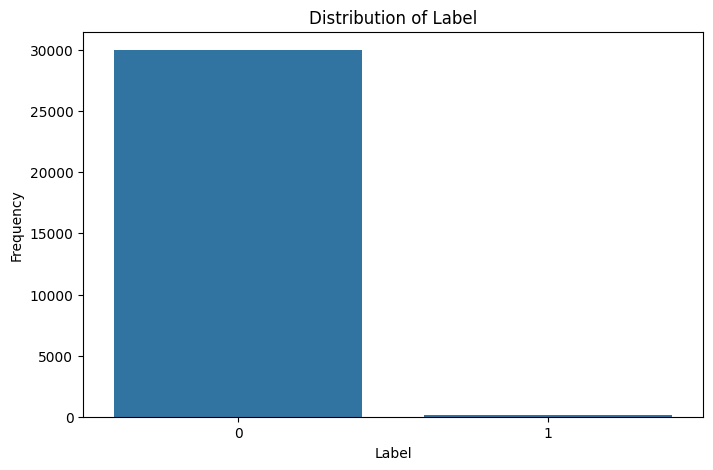

label                        1.000000
stscd                        0.384618
ecfg                         0.035812
flam1                        0.032135
conam                        0.032089
ecfg_3dsmk                   0.025227
flam1_log1p                  0.022658
conam_log1p                  0.022641
etymd                        0.020206
cano_ratio                   0.018898
hcefg                        0.016760
flam1_diff_avg7log1p_mcc     0.011151
flam1_diff_avg7log1p_cano    0.010910
flam1avg7_log1p_mcc          0.008638
flam1avg7_log1p_cano         0.006779
flam1avg7_cano_log1p         0.006292
locdt                        0.005435
contp                        0.005203
csmam                       -0.000518
ovrlt                       -0.000905
flbmk                       -0.000992
flam1conam_diff_log1p       -0.001369
bnsfg                       -0.002273
cano_cumcount7              -0.002722
chid_cumcount7              -0.003465
iterm                       -0.004881
weekday     

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of the label
label_distribution = data['label'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=label_distribution.index, y=label_distribution.values)
plt.title('Distribution of Label')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

# Checking the correlation of features with the label
correlation = data.corr()['label'].sort_values(ascending=False)

correlation



In [32]:
from sklearn.model_selection import train_test_split

# Defining the features and the target
X = data.drop('label', axis=1)
y = data['label']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Outputting the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((24088, 32), (6023, 32), (24088,), (6023,))

In [33]:
import xgboost as xgb

# 創建 XGBoost 分類器
xgb_classifier = xgb.XGBClassifier()

# 使用訓練集進行模型訓練
xgb_classifier.fit(X_train, y_train)

# 使用測試集評估模型性能
accuracy = xgb_classifier.score(X_test, y_test)

# 輸出準確度
print("模型準確度：", accuracy)


模型準確度： 0.998007637390005


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

# 使用模型預測測試集
y_pred = xgb_classifier.predict(X_test)

# 生成分類報告
classification_rep = classification_report(y_test, y_pred)

# 生成混淆矩陣
confusion_mat = confusion_matrix(y_test, y_pred)

classification_rep, confusion_mat


('              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      6010\n           1       0.56      0.38      0.45        13\n\n    accuracy                           1.00      6023\n   macro avg       0.78      0.69      0.73      6023\nweighted avg       1.00      1.00      1.00      6023\n',
 array([[6006,    4],
        [   8,    5]]))

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("/Users/linyinghsiao/Downloads/sample.csv")

# 分割特徵和標籤
X = data.drop('label', axis=1)
y = data['label']

# 應用 SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 分割數據集
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

# 定義要調整的超參數範圍
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# 創建XGBoost分類器
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# 使用網格搜索來找到最佳超參數組合
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# 獲得最佳超參數
best_params = grid_search.best_params_

# 獲得最佳模型
best_model = grid_search.best_estimator_


# 評估模型
y_pred = best_model.predict(X_test_resampled)

# 計算並顯示分類報告和混淆矩陣
class_report = classification_report(y_test_resampled, y_pred)
conf_matrix = confusion_matrix(y_test_resampled, y_pred)
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

# 計算並顯示其他模型指標
accuracy = accuracy_score(y_test_resampled, y_pred)
precision = precision_score(y_test_resampled, y_pred, average='macro')
recall = recall_score(y_test_resampled, y_pred, average='macro')
f1 = f1_score(y_test_resampled, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5909
           1       1.00      1.00      1.00      6091

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

Confusion Matrix:
 [[5901    8]
 [   5 6086]]
Accuracy: 0.9989166666666667
Precision: 0.998920318331466
Recall: 0.9989126248735161
F1 Score: 0.9989164091257106
